In [288]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq, irfft
from scipy.signal import resample

In [289]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)


<div style="text-align: right;", dir="rtl">
اين تابع به منظور اطمينان از وجود فايل و در غير اين صورت ساختن آن است.
</div>

In [290]:
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)


<div style="text-align: right;", dir="rtl">
اين توابع به منطور نمايش و ذخيره نمودار ها هستند
</div>

In [291]:
def plot_freq_amp(amplitudeAbs,frequency, title, save_path):
    plt.plot(frequency,amplitudeAbs)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    ensure_dir(save_path)
    plt.savefig(save_path)
    plt.show()
    plt.close()
    return 

In [292]:
def plot_spectrogram(amplitude, rate, title, save_path):
    plt.figure(figsize=(10, 6))
    plt.specgram(amplitude, Fs=rate)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    ensure_dir(save_path)
    plt.savefig(save_path)
    plt.show()
    plt.close()


<div style="text-align: right;", dir="rtl">
براي ذخيره فايل wave
</div>

In [293]:
def write_audio(file_path, rate, data):
    ensure_dir(file_path)
    wavfile.write(file_path, rate, data)


<div style="text-align: right;", dir="rtl">
اين فايل يك موج تك بعدي(مونو) است و در واقع يكي آرايه با shape: (687094,) است.
مقدار فركانس آن برابر 22050 است، كه اين به معناي گرفتن 22050 نمونه از موج در هر ثانيه است.
اگر تعداد اعضاي data را به rate تقسيم كنيم به طول اين فايل  بر حسب ثانيه ميرسيم كه برابر 31.16 است.


</div>


<div style="text-align: right;", dir="rtl">
rfft(data): 
 این تابع برای داده‌هایی که شامل اعداد مختلط نیستند، بلکه فقط اعداد حقیقی هستند، طراحی شده است. تابع rfftfreq() همیشه به همراه rfft() استفاده می‌شود زیرا به ما اجازه می‌دهد تا واحدهای فرکانس مناسب را بدست آوریم. 

 
 قسمت موهومی تبدیل، می‌توان از آن برای محاسبه فاز سیگنال استفاده كرد اما  به قسمت فاز نیاز نداریم. بنابراین، برای به‌دست آوردن طیف دامنه در مقابل فرکانس، مقدار مطلق تبدیل فوریه را می‌یابیم
</div>

shape of data: (687094,)
rate: 22050
duration: 31.160725623582767


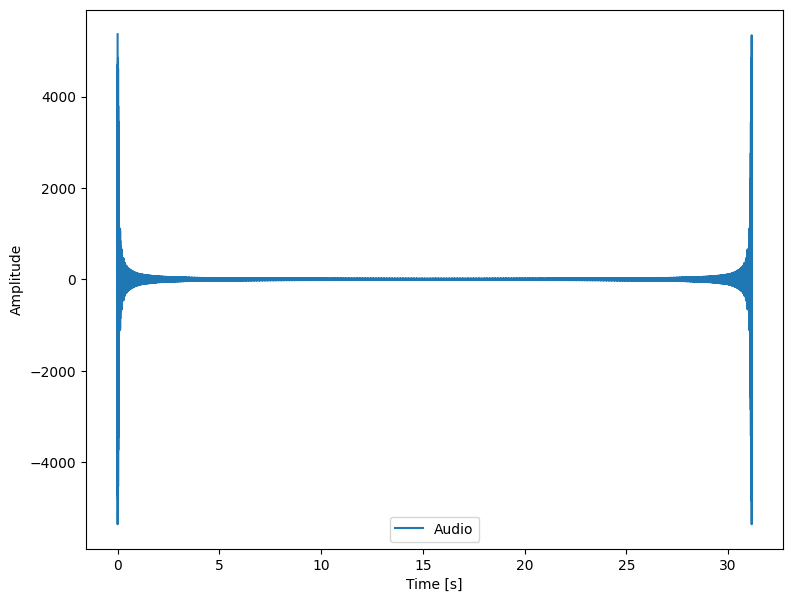

c:\Users\parmiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


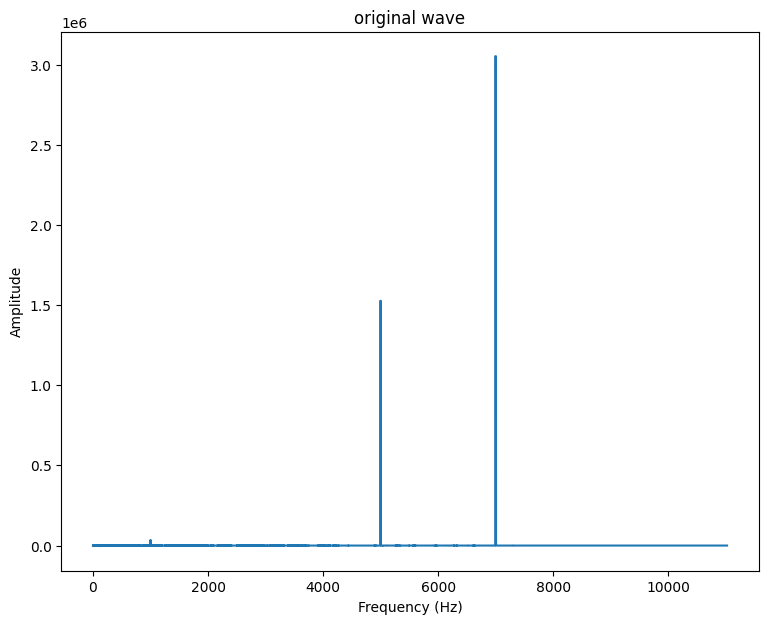

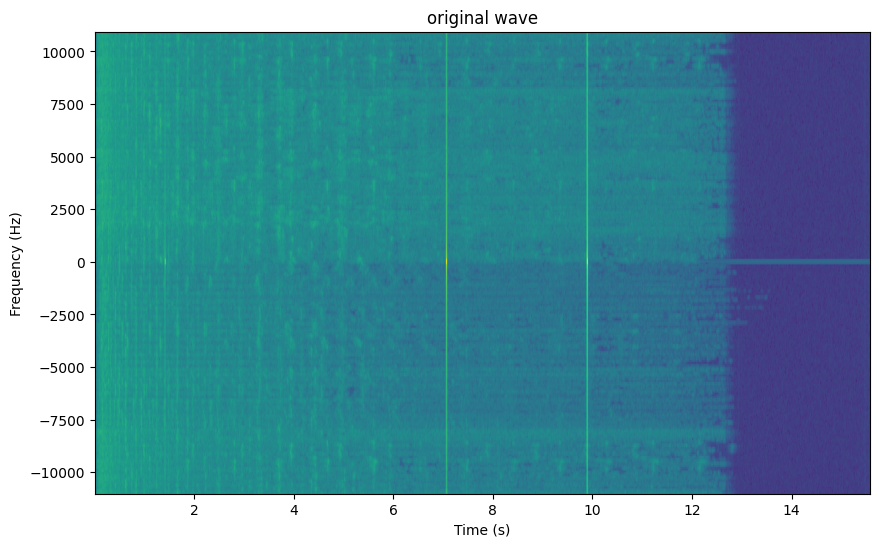

frequency = 993.6 Hz with amplitude (30524+7j) 
frequency = 993.6 Hz with amplitude (30475+173j) 
frequency = 993.6 Hz with amplitude (30590-58j) 
frequency = 993.7 Hz with amplitude (30495+40j) 
frequency = 993.7 Hz with amplitude (30369+42j) 
frequency = 993.7 Hz with amplitude (30672-29j) 
frequency = 993.8 Hz with amplitude (30488-35j) 
frequency = 993.8 Hz with amplitude (30391+70j) 
frequency = 993.8 Hz with amplitude (30518-93j) 
frequency = 993.8 Hz with amplitude (30440-85j) 
frequency = 993.9 Hz with amplitude (30627-122j) 
frequency = 993.9 Hz with amplitude (30544+3j) 
frequency = 993.9 Hz with amplitude (30609-72j) 
frequency = 994.0 Hz with amplitude (30590+19j) 
frequency = 994.0 Hz with amplitude (30480+33j) 
frequency = 994.0 Hz with amplitude (30504+3j) 
frequency = 994.1 Hz with amplitude (30476+67j) 
frequency = 994.1 Hz with amplitude (30590-64j) 
frequency = 994.1 Hz with amplitude (30450-27j) 
frequency = 994.2 Hz with amplitude (30591+62j) 
frequency = 994.2 Hz 

In [294]:
def read_voice(path):
    rate, data = wavfile.read(path)
    data=data/2.0**15
    amplitude = rfft(data)
    amplitudeAbs=abs(amplitude)
    frequency = rfftfreq(len(data), 1 / rate)
    return rate, data,amplitude,frequency
rate,data,amplitude,frequency=read_voice( r'potc.wav')
print("shape of data:",data.shape)
print("rate:",rate)
length_in_s = data.shape[0] / rate
print("duration:",length_in_s)
time = np.linspace(0., length_in_s, data.shape[0])
plt.plot(time, data, label="Audio")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
plot_freq_amp(amplitude,frequency,"original wave",r'newaudio/original_freq_amp.png')
plot_spectrogram(amplitude,rate,"original wave",r'newaudio/original_spectrogram.png')
for i,f in enumerate(amplitude):
        if f > 10e3: #looking at amplitudes of the spikes higher than 350 
            print('frequency = {} Hz with amplitude {} '.format(np.round(frequency[i],1),  np.round(f)))


<div style="text-align: right;", dir="rtl">
برا اساس مشاهدات در فركانس هاي حدود 5000و 1000و 7000  peak مشاهده ميشود و به منظور حذف نويز بايد اين بخش هارا از بين ببريم.
</div>

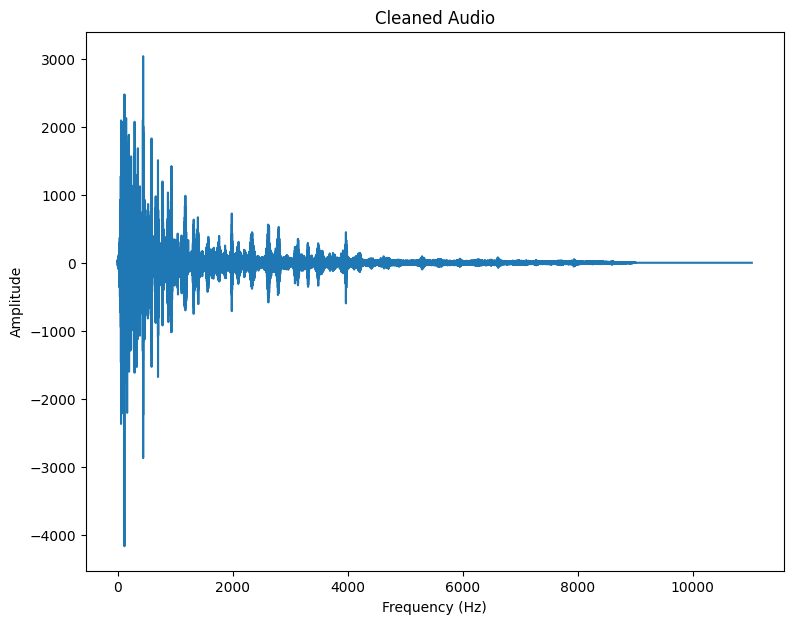

c:\Users\parmiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:7720: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


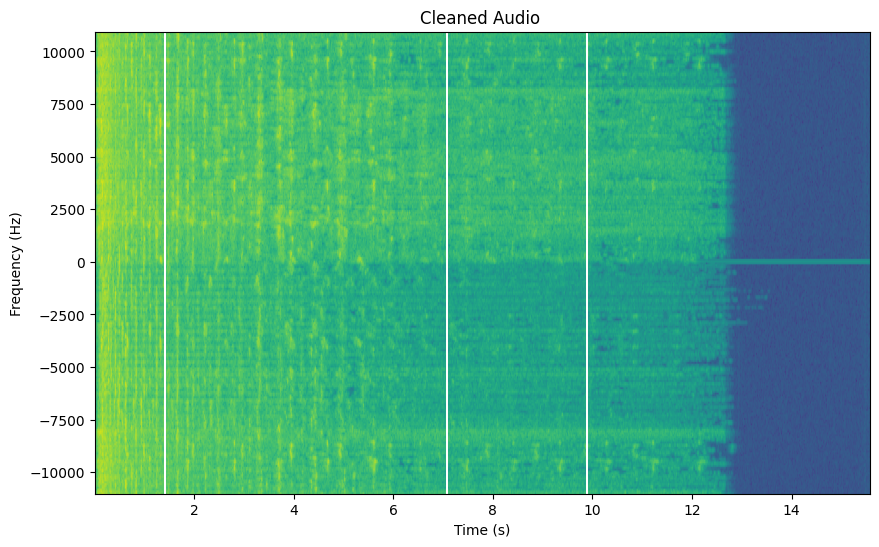

In [295]:
def remove_noise(amplitudeAbs,frequency):
    for i,f in enumerate(frequency):
        if f <= 5006.4 and f >=  4993.5:
            amplitudeAbs[i] = 0.0
        if f <= 7006.4 and f >= 6993.5:
            amplitudeAbs[i] = 0.0
        if f <= 1006.4 and f >= 993.5:
            amplitudeAbs[i] = 0.0
    noiselessData = np.fft.irfft(amplitudeAbs)
    return amplitudeAbs,noiselessData
cleaned_amplitude,noiselessData=remove_noise(amplitude,frequency)
cleaned_amplitude=(cleaned_amplitude)
plot_freq_amp(cleaned_amplitude,frequency,"Cleaned Audio", r'newaudio/cleaned_freq_amp.png')
plot_spectrogram(cleaned_amplitude,rate,"Cleaned Audio ", r'newaudio/cleaned_spectrogram.png')
write_audio(r'newaudio/cleaned.wav',rate,noiselessData)


<div style="text-align: right;", dir="rtl">
اين تابع براي تغيير سرعت طراحي شده:
</div>

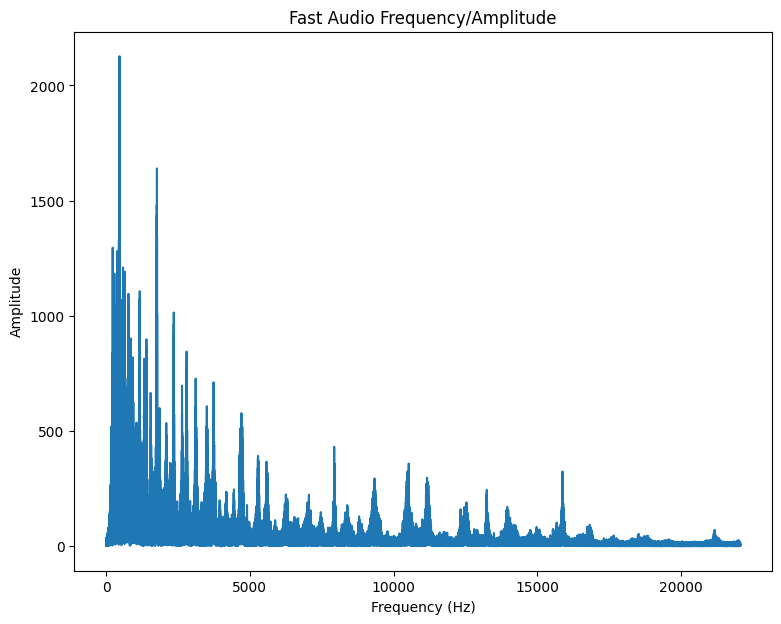

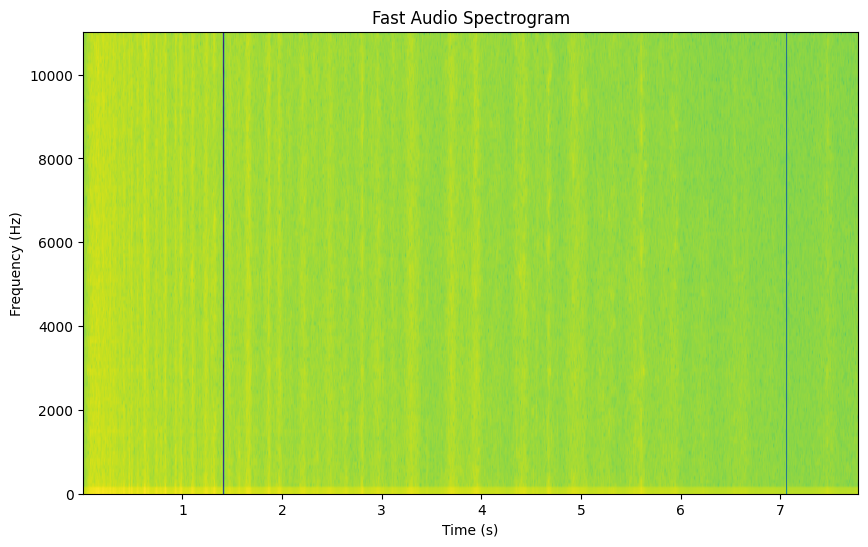

In [296]:
def change_voice_speed(data, rate, speed_factor):
    new_rate = int(rate * speed_factor)
    new_data = resample(data, int(len(data) / speed_factor))
    return new_data, new_rate

fast_data, fast_rate = change_voice_speed(noiselessData, rate, 2)
fastAmplitude =abs(rfft(fast_data))
fastFrequency = rfftfreq(len(fast_data), 1 / fast_rate)
plot_freq_amp(fastAmplitude,fastFrequency, 'Fast Audio Frequency/Amplitude', r'newaudio/fast_frequency_amplitude.png')
plot_spectrogram(fastAmplitude,rate, 'Fast Audio Spectrogram', r'newaudio/fast_spectrogram.png')
write_audio(r'newaudio/fast.wav', rate, fast_data)

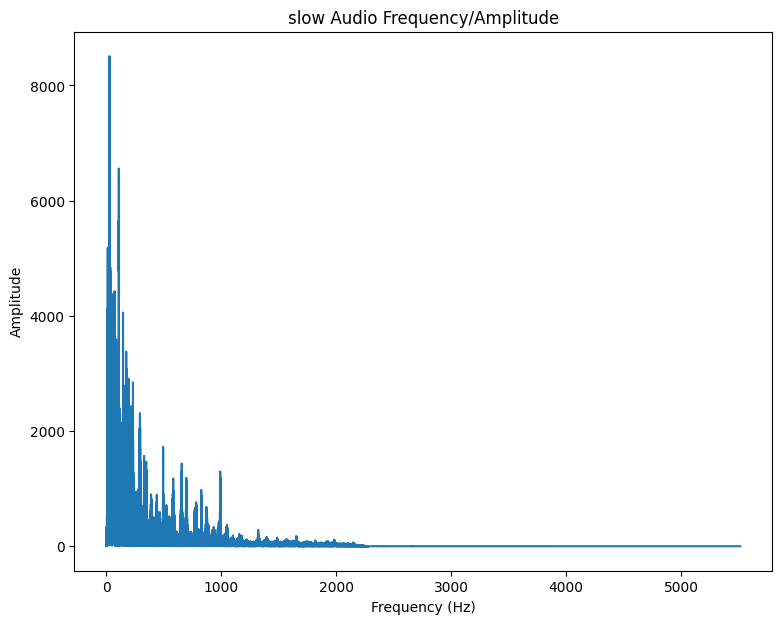

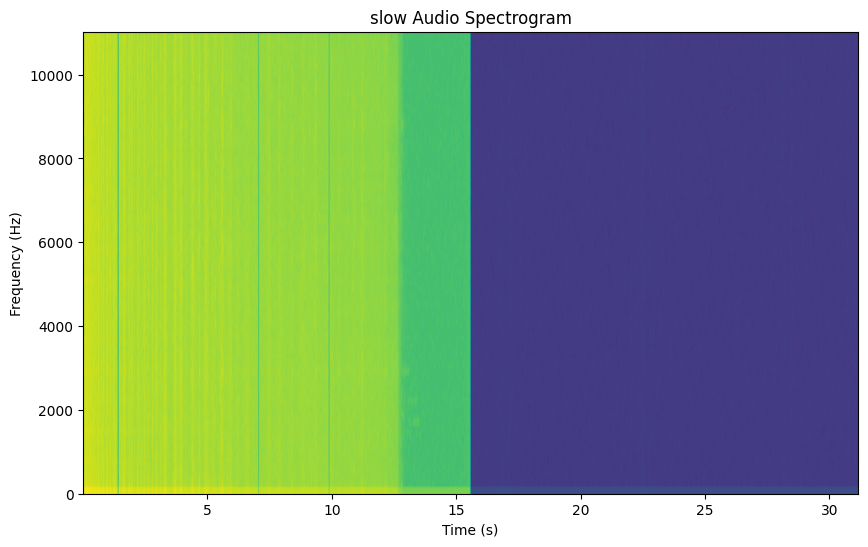

In [297]:
slow_data, slow_rate = change_voice_speed(noiselessData, rate, 1/2)
slowAmplitude =abs(rfft(slow_data))
slowFrequency = rfftfreq(len(slow_data), 1 / slow_rate)
plot_freq_amp(slowAmplitude,slowFrequency, 'slow Audio Frequency/Amplitude', r'newaudio/slow_frequency_amplitude.png')
plot_spectrogram(slowAmplitude,rate, 'slow Audio Spectrogram', r'newaudio/slow_spectrogram.png')
write_audio(r'newaudio/slow.wav', rate, slow_data)


<div style="text-align: right;", dir="rtl">
اين تابع براي معكوس كردن طراحي شده:
</div>

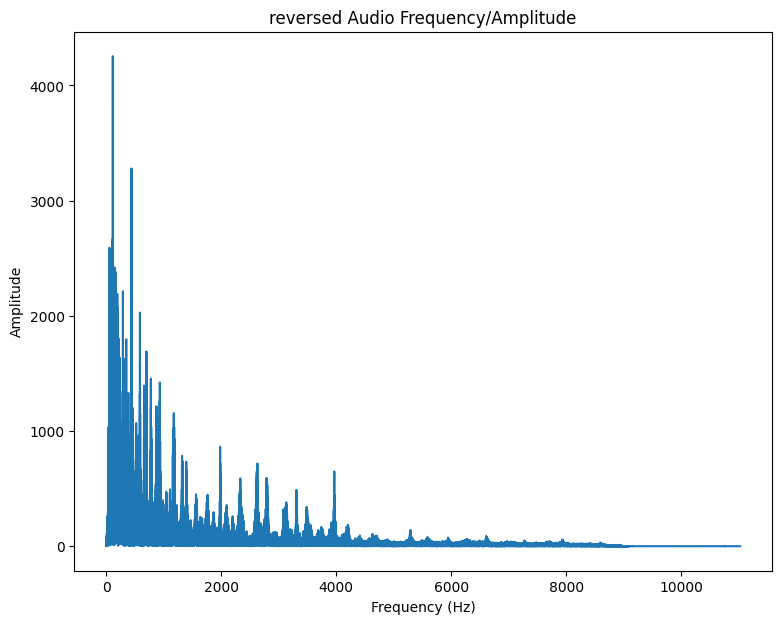

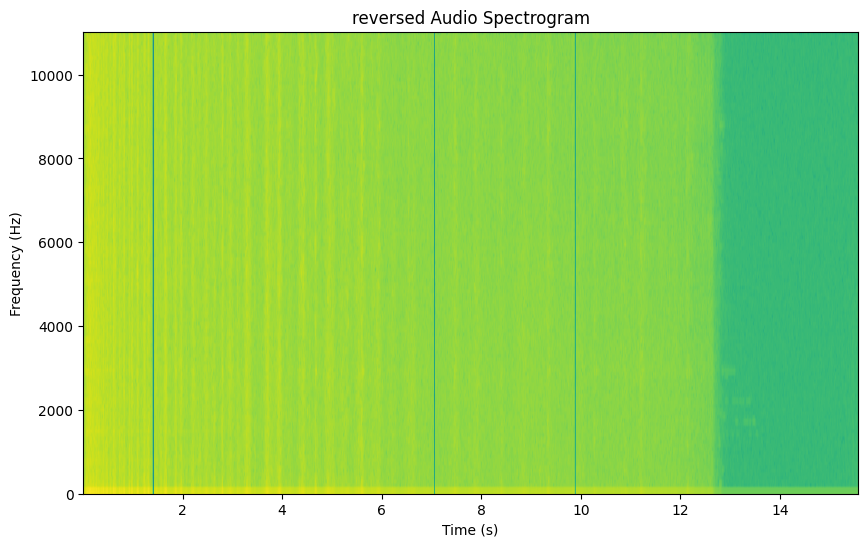

In [298]:

def reverse_voice(data):
    return data[::-1]
reversed_data = reverse_voice(noiselessData)
reversedAmplitude =abs(rfft(reversed_data))
reversedFrequency = rfftfreq(len(reversed_data), 1 / rate)
plot_freq_amp(reversedAmplitude,reversedFrequency, 'reversed Audio Frequency/Amplitude', r'newaudio/reversed_frequency_amplitude.png')
plot_spectrogram(reversedAmplitude,rate, 'reversed Audio Spectrogram', r'newaudio/reversed_spectrogram.png')
write_audio(r'newaudio/reversed.wav', rate, reversed_data)


<div style="text-align: right;", dir="rtl">
براي تركيب تمام اسن فايل ها به شكل زير عمل ميكنيم.

</div>

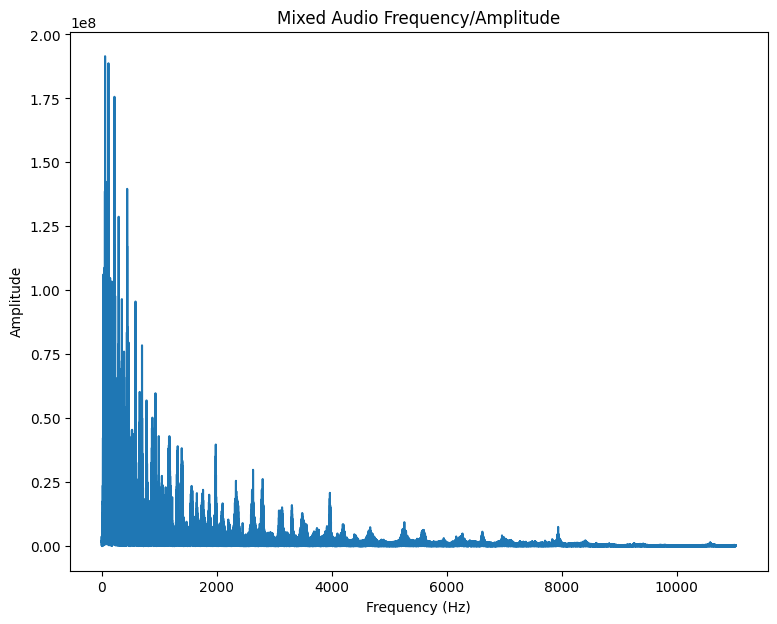

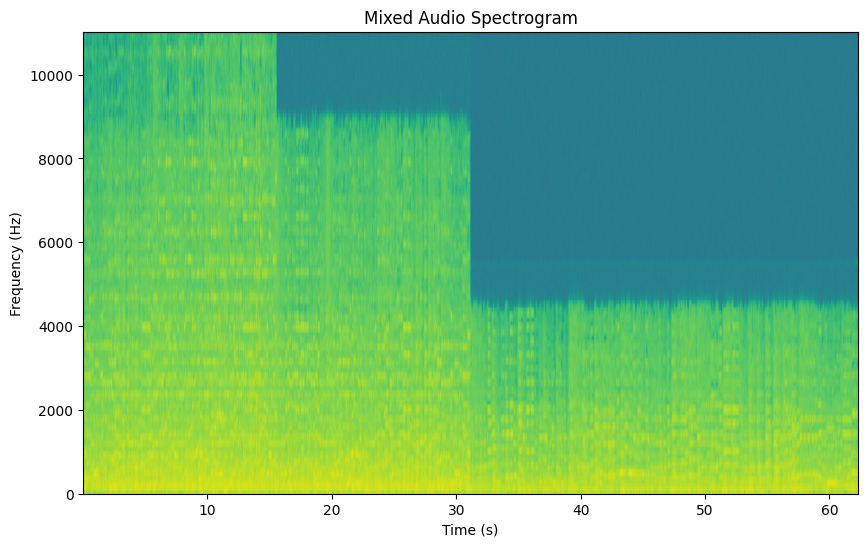

In [300]:
def mix_voices(file_paths, output_file):
    signals = []
    max_length = 0
    max_rate = 0

    for file_path in file_paths:
        rate, data ,amplitude,frequency= read_voice(file_path)
        if len(data) > max_length:
            max_length = len(data)
        if rate > max_rate:
            max_rate = rate
        signals.append((rate, data))

    # Resample all signals to the maximum rate and length
    resampled_signals = []
    for rate, data in signals:
        if rate != max_rate:
            # Resample data to max_rate
            data = resample(data, int(len(data) * max_rate / rate))
        # Pad signal to max_length
        if len(data) < max_length:
            data = np.pad(data, (0, max_length - len(data)), mode='constant')
        resampled_signals.append(data)

    # Compute the FFT of each signal and sum them
    summed_spectrum = np.zeros(max_length // 2 + 1, dtype=complex)
    for signal in resampled_signals:
        fft_spectrum = np.fft.rfft(signal)
        summed_spectrum += fft_spectrum

    # Inverse FFT to get the mixed signal
    mixed_signal = np.fft.irfft(summed_spectrum)

    # Ensure the mixed signal is in the int16 range
    mixed_signal = np.int16(mixed_signal / np.max(np.abs(mixed_signal)) * 32767)

    # Write the mixed signal to the output file
    ensure_dir(output_file)
    wavfile.write(output_file, max_rate, mixed_signal)
    mixedAmplitude =abs(rfft(mixed_signal))
    mixedFrequency = rfftfreq(len(mixed_signal), 1 / rate)
    plot_freq_amp(mixedAmplitude,mixedFrequency, 'Mixed Audio Frequency/Amplitude', r'newaudio/mix_frequency_amplitude.png')
    plot_spectrogram(mixed_signal,max_rate, 'Mixed Audio Spectrogram', r'newaudio/mix_spectrogram.png')
# Example usage
file_paths = [r'newaudio/cleaned.wav',r'newaudio/fast.wav',r'newaudio/slow.wav',r'newaudio/reversed.wav']
output_file = r'newaudio/mixpotc.wav'
mix_voices(file_paths, output_file)

